## Importing libraries  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv('IPanalyse.csv')

In [6]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.99,192.168.1.25,TCP,60,1098 > 10001 [ACK] Seq=1 Ack=1 Win=509 Len=0
1,2,0.043982,142.250.77.174,192.168.1.25,TLSv1.2,127,Application Data
2,3,0.044126,192.168.1.25,142.250.77.174,TCP,54,"9632 > 443 [FIN, ACK] Seq=1 Ack=74 Win=511 L..."
3,4,0.080455,142.250.77.174,192.168.1.25,TCP,60,"443 > 9632 [FIN, ACK] Seq=74 Ack=2 Win=276 L..."
4,5,0.080490,192.168.1.25,142.250.77.174,TCP,54,9632 > 443 [ACK] Seq=2 Ack=75 Win=511 Len=0


In [7]:
# Extract relevant columns
df = df[['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']]

##  Analyze network behavior 

In [8]:
# Example: Count the occurrences of each protocol
protocol_counts = df['Protocol'].value_counts()

##  Identify malicious behavior 

In [9]:
# Example: Find packets with suspicious flags (FIN, ACK)
malicious_packets = df[df['Info'].str.contains('FIN, ACK')]

##  Identify the IP address of the victim and source

In [10]:
victim_ip = df['Destination'].value_counts().idxmax()
source_ips = df['Source'].unique()

##  Visualize an attack 

### Example: Plot the number of packets over time

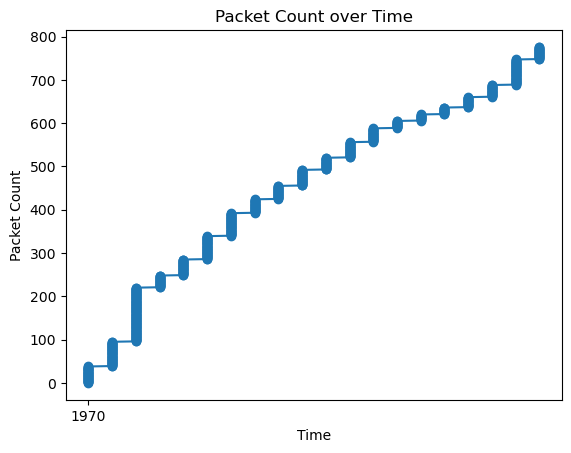

In [11]:
df['Time'] = pd.to_datetime(df['Time'])
plt.plot(df['Time'], range(len(df)), marker='o')
plt.xlabel('Time')
plt.ylabel('Packet Count')
plt.title('Packet Count over Time')
plt.show()

### Protocol Distribution 

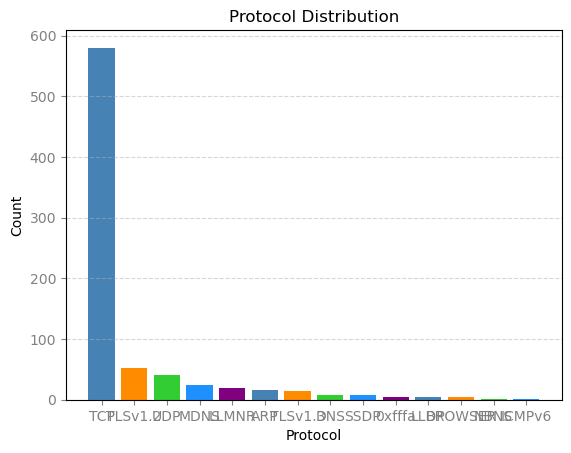

In [16]:
protocol_counts = df['Protocol'].value_counts()
colors = ['steelblue', 'darkorange', 'limegreen', 'dodgerblue', 'purple']
plt.bar(protocol_counts.index, protocol_counts.values, color=colors)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Protocol Distribution')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Source IP Distribution

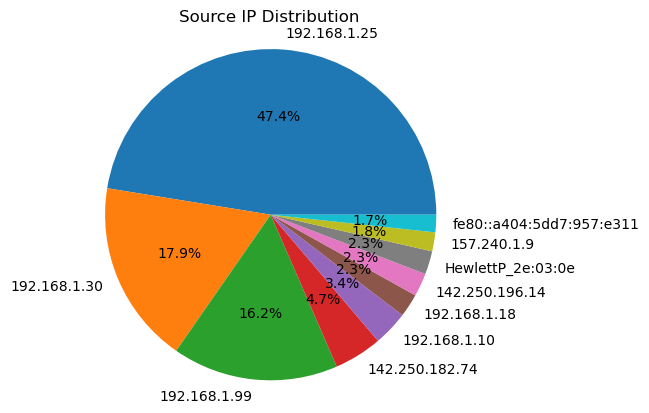

In [13]:
source_ip_counts = df['Source'].value_counts().head(10)
plt.pie(source_ip_counts, labels=source_ip_counts.index, autopct='%1.1f%%')
plt.title('Source IP Distribution')
plt.axis('equal')
plt.show()


### Packet Length Distribution

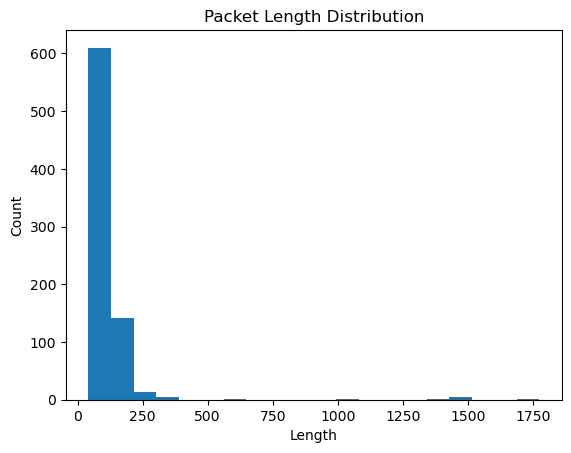

In [14]:
plt.hist(df['Length'], bins=20)
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Packet Length Distribution')
plt.show()

### Packet Length vs. Time 

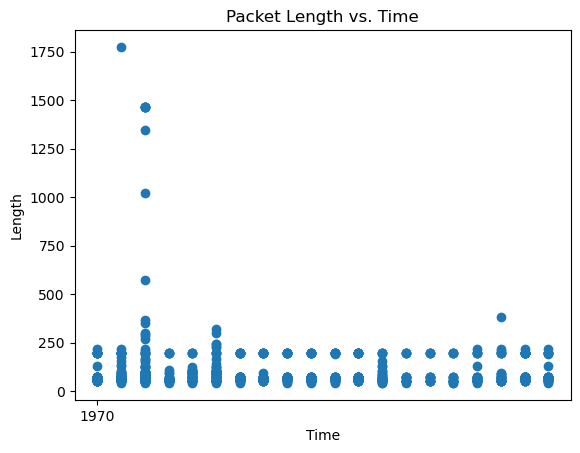

In [15]:
plt.scatter(df['Time'], df['Length'])
plt.xlabel('Time')
plt.ylabel('Length')
plt.title('Packet Length vs. Time')
plt.show()